# Collecting SMS from CSV and storing every SMS in separate TXT files

In [24]:
import nltk,csv,numpy
nltk.download('cmudict')
from nltk import sent_tokenize, word_tokenize, pos_tag
import matplotlib.pyplot as plt
import re
from toolz import partition

hamcount=0
spamcount=0

reader = csv.reader(open('spam.csv'), delimiter= ",",quotechar='|')

for line in reader:
    if(line[0]=="ham"):
        hamcount=hamcount+1
        name = './data/ham/'+str(hamcount)+'.txt'
        with open(name, 'w') as f:
            f.writelines(line[1])
        f.close()
    elif(line[0]=="spam"):
        spamcount=spamcount+1
        name = './data/spam/'+str(spamcount)+'.txt'
        with open(name, 'w') as f:
            f.writelines(line[1])
        f.close()

[nltk_data] Downloading package cmudict to
[nltk_data]     /Users/vghavate3103/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


# Creating Corpus using txt files

In [25]:
Ham = nltk.corpus.PlaintextCorpusReader('./data/ham',
                                         fileids=r'.*',
                                         word_tokenizer=nltk.tokenize.WhitespaceTokenizer(),
                                         sent_tokenizer=nltk.tokenize.RegexpTokenizer('\n', gaps=True))
Spam = nltk.corpus.PlaintextCorpusReader('./data/spam',
                                         fileids=r'.*',
                                         word_tokenizer=nltk.tokenize.WhitespaceTokenizer(),
                                         sent_tokenizer=nltk.tokenize.RegexpTokenizer('\n', gaps=True))

# Count of Words and Sentences in SMS Corpus

In [26]:
print("Ham")
print("Number of Words: ",len(Ham.words()),"Number of Sentences: ",len(Ham.sents()))
print("Spam")
print("Number of Words: ",len(Spam.words()),"Number of Sentences: ",len(Spam.sents()))

Ham
Number of Words:  54056 Number of Sentences:  4825
Spam
Number of Words:  14667 Number of Sentences:  747


# MSTTR Comparision for Ham and Spam SMS

In [27]:
def norm(tokens):
    return [tok.lower() for tok in tokens if tok.isalpha()]

def ttr(tokens):
    return len(set(tokens)) / len(tokens)

def msttr(tokens, k=2000):
    ttrs = [ttr(chunk) for chunk in partition(k, tokens)]
    return sum(ttrs)/len(ttrs)

HamWord=norm(Ham.words())
SpamWord=norm(Spam.words())

In [28]:
msttr(HamWord, k=1000)

0.4645581395348838

In [29]:
msttr(SpamWord, k=1000)

0.3959

# Comparing Lexical Richness through FK Readbility Test

In [30]:
cmudict = nltk.corpus.cmudict.dict()

def syllables(word):
    if word in cmudict:
        return len([p for p in cmudict[word][0] if p[-1].isdigit()])
    else:
        return len(re.findall(r'[aeiou]+', word))

def fk(fileid,SMS):
    words = len(SMS.words(fileids=fileid))
    sylls = sum([syllables(w) for w in SMS.words(fileids=fileid)])
    sents = len(SMS.sents(fileids=fileid))
    return 0.39*(words/sents) + 11.8*(sylls/words) - 15.59

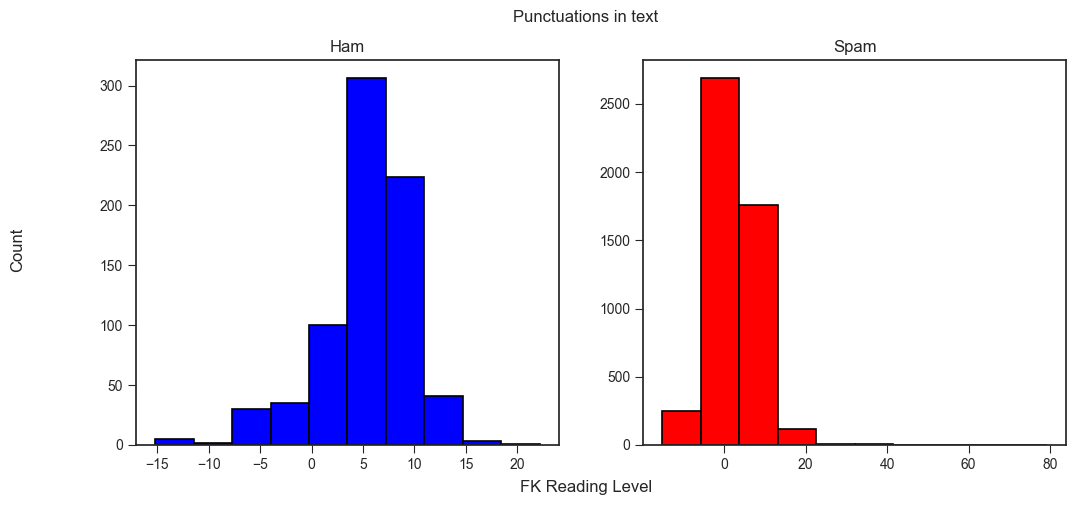

In [31]:
Hx = [fk(fileid,Spam) for fileid in Spam.fileids()]
Sx = [fk(fileid,Ham) for fileid in Ham.fileids()]

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.hist(Hx,color="b",edgecolor='black', linewidth=1.2)
ax1.set_title("Ham")
ax2.hist(Sx,color="red",edgecolor='black', linewidth=1.2)
ax2.set_title("Spam")
plt.style.use('seaborn-v0_8-ticks')
fig.supylabel('Count')
fig.supxlabel('FK Reading Level')
plt.suptitle("Punctuations in text")
plt.show()

# Frequency Distribution

In [32]:
bigram_measures = nltk.collocations.BigramAssocMeasures
ham_freq = nltk.FreqDist(HamWord)
spam_freq = nltk.FreqDist(SpamWord)
all_freq = ham_freq + spam_freq
key = nltk.FreqDist()
for w in ham_freq:
    if ham_freq[w] >= 10:
        z = bigram_measures.likelihood_ratio(ham_freq[w], 
                                             (all_freq[w], ham_freq.N()), 
                                             all_freq.N())
        if ham_freq[w]/all_freq[w] > ham_freq.N()/all_freq.N():
            key[w] = z
for k,v in key.most_common(25):
    print(f'{k:10} {v:8.2f}')

i            559.96
my           173.61
me           119.73
but          101.29
not           74.22
in            63.57
that          60.13
he            59.90
come          59.38
how           55.79
so            55.41
at            55.30
it            53.76
got           52.68
ok            50.76
going         43.02
then          40.34
was           36.72
its           36.72
she           36.44
you           35.96
da            35.57
do            35.40
like          34.51
home          34.19


In [33]:
key = nltk.FreqDist()
for w in spam_freq:
    if spam_freq[w] >= 10:
        z = bigram_measures.likelihood_ratio(spam_freq[w], 
                                             (all_freq[w], spam_freq.N()), 
                                             all_freq.N())
        if spam_freq[w]/all_freq[w] > spam_freq.N()/all_freq.N():
            key[w] = z
for k,v in key.most_common(25):
    print(f'{k:10} {v:8.2f}')

call         411.73
free         336.49
claim        291.74
txt          271.09
mobile       250.97
won          206.38
reply        191.08
nokia        164.05
to           157.37
win          152.61
text         149.81
prize        144.08
your         136.87
contact      135.48
service      126.21
tone         117.86
stop         116.42
awarded      114.58
our          110.28
cash         106.96
or           105.43
draw         101.12
latest        96.72
guaranteed    94.93
shows         87.25


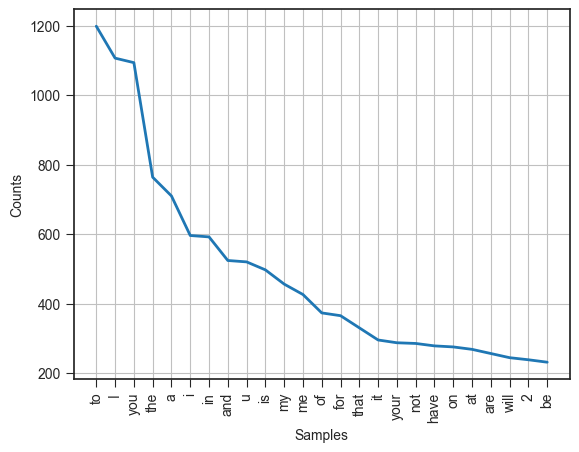

<Axes: xlabel='Samples', ylabel='Counts'>

In [34]:
HamFreq=nltk.FreqDist(Ham.words())
HamFreq.plot(25)

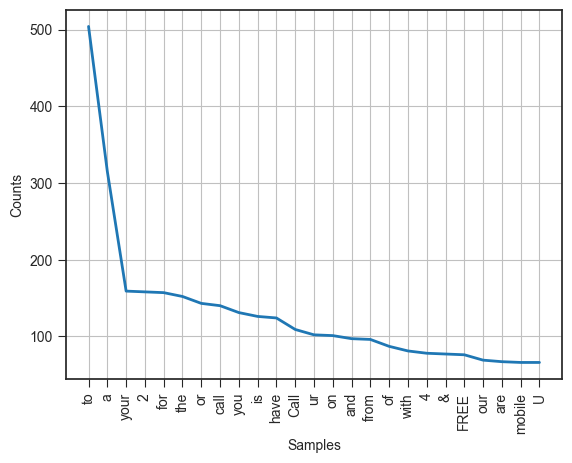

<Axes: xlabel='Samples', ylabel='Counts'>

In [35]:
SpamFreq=nltk.FreqDist(Spam.words())
SpamFreq.plot(25)

# Concordance

In [36]:
text = nltk.Text(Ham.words())
text.concordance(['free'])

Displaying 25 of 37 matches:
'm almost home Total video converter free download type this in google search:
fied with the experience. Reply Toll Free with Yes or No. Why tired what speci
semester. "He will No dear i do have free messages without any recharge. Hi hi
so will text u later when a bit more free for chat... U haven t lost me ill al
nd God's love is yours. "I prefer my free days... Tues Alrite jod hows the rev
llage to Delhi 4 lane roads. Forever free power suply to more than &lt;#&gt; s
fied with the experience. Reply Toll Free with Yes or No. My friends use to ca
n do it Today i'm not workin but not free oso... Gee... Thgt u workin at ur fr
 here when I woke ... :-( Hey now am free you can call me. I cant pick the pho
Abbey! Happy New Year. Abiola Now am free call me pa. R u saying i should re o
nna go out with jiayin. But she isnt free "That's fine "Sorry "Sorry Then u go
t get my voice. So call you asa i'll free "Cool Happy birthday... May u find u
at check. I will come t

In [37]:
Spamtext = nltk.Text(Spam.words())
Spamtext.concordance(['free'])

Displaying 25 of 155 matches:
 Free entry in 2 a wkly comp to win FA Cup
l you re your reply to our sms for a free nokia mobile + free camcorder. Pleas
to our sms for a free nokia mobile + free camcorder. Please call now 080009307
ur phone 11mths+? Call MobilesDirect free on 08000938767 to update now! or2sto
 the mobile community. (100p/SMS) "5 Free Top Polyphonic Tones call 0870187287
day! Text SHOP to 85023 now! SavaMob FREE for 1st week! No1 Nokia tone 4 ur mo
even 1000 cashto claim UR award call free on 08000407165 (18+) 2 stop getstop 
ded either 500 of CD gift vouchers & Free entry 2 our 100 weekly draw txt MUSI
at do U want for Xmas? How about 100 free text messages & a new video phone wi
ne with half price line rental? Call free now on 0800 0721072 to find out more
. tv/ to collect your content. "Your free ringtone is waiting to be collected.
oothHdset FREE. Nokia FREE. Motorola FREE & DoubleMins & DoubleTxt on Orange c
eUpd8 on 08000839402 or call 2optout FREE for 1st week! No

# Comapring TTR of Spam and Ham SMS

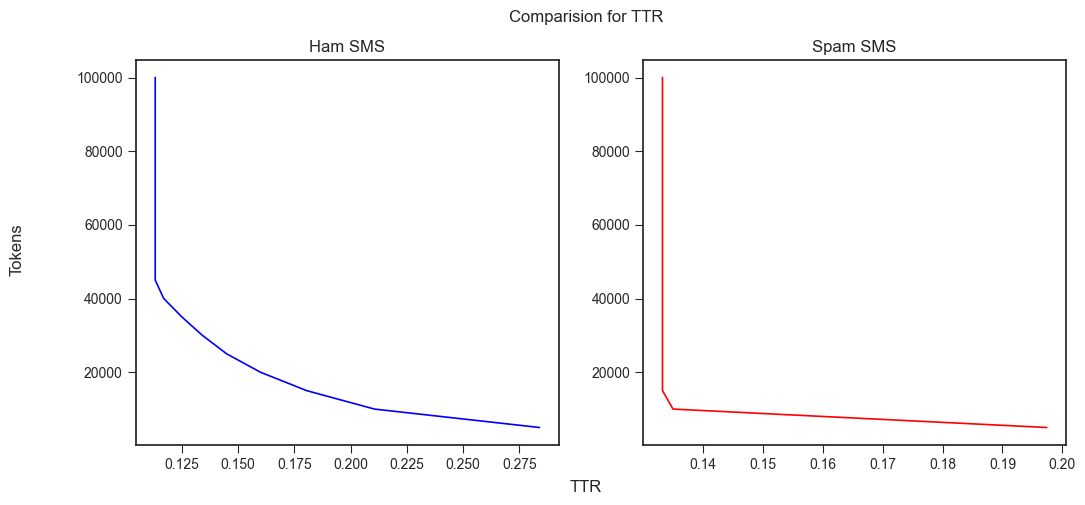

In [38]:
x = list(range(5000, 100001, 5000))
Sy = [ttr(SpamWord[:l]) for l in x]
Hy = [ttr(HamWord[:l]) for l in x]

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

ax1.plot(Hy,x,color="b", linewidth=1.2)
ax1.set_title("Ham SMS")

ax2.plot(Sy,x,color="red", linewidth=1.2)
ax2.set_title("Spam SMS")

fig.supxlabel('TTR')
fig.supylabel('Tokens')
plt.style.use('seaborn-v0_8-ticks')
plt.suptitle("Comparision for TTR")
plt.show()

# ARI

In [39]:
def ari(words,sents):
    n_chars = sum([ len(w) for w in words ])
    n_words = len(words)
    n_sents = len(sents)
    return 4.71*(n_chars/n_words) + 0.5*(n_words/n_sents) - 21.43
print("Ham",ari(Ham.words(),Ham.sents()))
print("Spam",ari(Spam.words(),Spam.sents()))

Ham 3.2858620047450273
Spam 10.813959606065907


# Mendenhall's Characteristic Curves of Composition

In [40]:
def mendenhall(tokens):
    lengths = nltk.FreqDist([len(tok) for tok in tokens])
    x = sorted(lengths.keys())
    y = [lengths[l] for l in x]
    return x, y

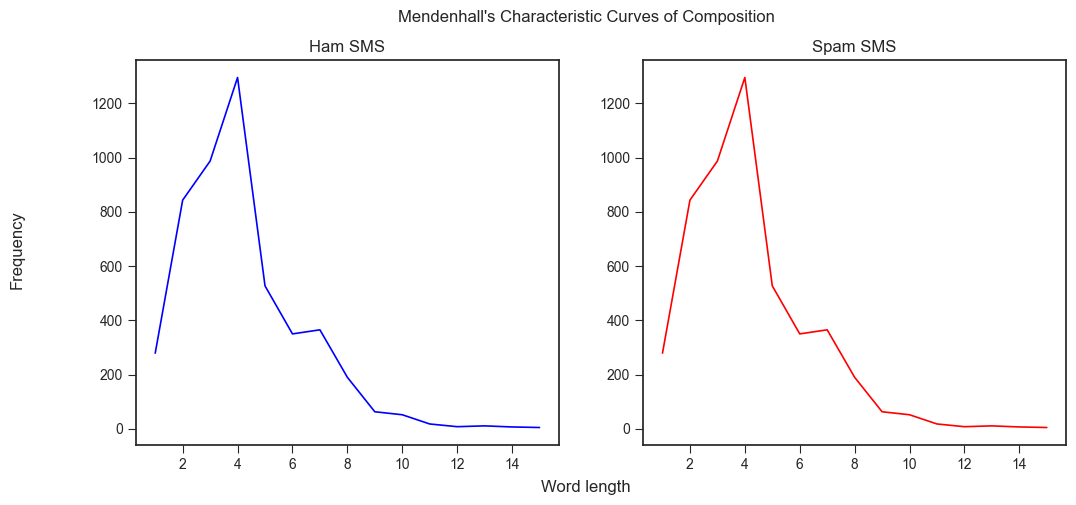

In [41]:
Sx, Sy = mendenhall(SpamWord[:5000])
Hx, Hy = mendenhall(SpamWord[:5000])

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

ax1.plot(Hx,Hy,color="b", linewidth=1.2)
ax1.set_title("Ham SMS")

ax2.plot(Sx,Sy,color="red", linewidth=1.2)
ax2.set_title("Spam SMS")

fig.supxlabel('Word length')
fig.supylabel('Frequency')
plt.style.use('seaborn-v0_8-ticks')
plt.suptitle("Mendenhall's Characteristic Curves of Composition")
plt.show()


In [42]:
freq = nltk.FreqDist(HamWord)
spectrum = nltk.FreqDist(freq.values())

spectrum[1], spectrum[2]
(7384, 2836)
def expected(M, N, S):
    return S.N() - sum([S[f]*(1-M/N)**f for f in S])
def expected_plot(tokens, title):
    freq = nltk.FreqDist(tokens)
    spectrum = nltk.FreqDist(freq.values())

    x, y1 = growth(tokens)
    plt.plot(x, y1, label='Actual')
    y2 = [expected(i, freq.N(), spectrum) for i in x]
    plt.plot(x, y2, label='Expected')
    plt.legend()
    plt.xlabel('M')
    plt.ylabel('V(M)')
    plt.title(title)
    plt.show()
expected_plot(HamWord, 'Ham')

NameError: name 'growth' is not defined

In [43]:
freq = nltk.FreqDist(SpamWord)
spectrum = nltk.FreqDist(freq.values())

spectrum[1], spectrum[2]
(7384, 2836)
def expected(M, N, S):
    return S.N() - sum([S[f]*(1-M/N)**f for f in S])
def expected_plot(tokens, title):
    freq = nltk.FreqDist(tokens)
    spectrum = nltk.FreqDist(freq.values())

    x, y1 = growth(tokens)
    plt.plot(x, y1, label='Actual')
    y2 = [expected(i, freq.N(), spectrum) for i in x]
    plt.plot(x, y2, label='Expected')
    plt.legend()
    plt.xlabel('M')
    plt.ylabel('V(M)')
    plt.title(title)
    plt.show()
expected_plot(SpamWord, 'Spam')

NameError: name 'growth' is not defined

# Collocations

In [44]:
tokens = [tok.lower() for tok in Ham.words()]
list(nltk.ngrams(tokens, 4))[:5]
bundles = nltk.FreqDist(nltk.ngrams(norm(Ham.words()), 4))
bundles.most_common(10)

[(('i', 'cant', 'pick', 'the'), 12),
 (('cant', 'pick', 'the', 'phone'), 12),
 (('pick', 'the', 'phone', 'right'), 12),
 (('the', 'phone', 'right', 'pls'), 12),
 (('phone', 'right', 'pls', 'send'), 12),
 (('right', 'pls', 'send', 'a'), 12),
 (('pls', 'send', 'a', 'message'), 12),
 (('on', 'the', 'way', 'to'), 8),
 (('hope', 'you', 'are', 'having'), 7),
 (('you', 'are', 'having', 'a'), 7)]

In [45]:
list(nltk.ngrams(Ham.words(), 4))[:5]
bundles = nltk.FreqDist(nltk.ngrams(norm(Spam.words()), 4))
bundles.most_common(10)

[(('you', 'have', 'won', 'a'), 31),
 (('your', 'account', 'statement', 'for'), 16),
 (('a', 'prize', 'call', 'from'), 15),
 (('we', 'are', 'trying', 'to'), 14),
 (('are', 'trying', 'to', 'contact'), 14),
 (('draw', 'shows', 'that', 'you'), 14),
 (('prize', 'call', 'from', 'land'), 14),
 (('call', 'from', 'land', 'claim'), 14),
 (('account', 'statement', 'for', 'shows'), 14),
 (('have', 'won', 'a', 'guaranteed'), 13)]

In [46]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finderSpam = nltk.collocations.BigramCollocationFinder.from_words(norm(Spam.words()))
finderHam = nltk.collocations.BigramCollocationFinder.from_words(norm(Ham.words()))

In [47]:
finderHam.apply_freq_filter(25)
finderHam.nbest(bigram_measures.pmi, 10)

[('how', 'much'),
 ('a', 'great'),
 ('will', 'be'),
 ('tell', 'me'),
 ('the', 'way'),
 ('how', 'are'),
 ('out', 'of'),
 ('call', 'me'),
 ('want', 'to'),
 ('we', 'can')]

In [48]:
finderHam.nbest(bigram_measures.likelihood_ratio, 10)

[('are', 'you'),
 ('i', 'am'),
 ('going', 'to'),
 ('have', 'a'),
 ('want', 'to'),
 ('will', 'be'),
 ('i', 'will'),
 ('do', 'you'),
 ('a', 'great'),
 ('how', 'much')]

In [49]:
finderSpam.apply_freq_filter(25)
finderSpam.nbest(bigram_measures.pmi, 10)

[('have', 'won'),
 ('please', 'call'),
 ('this', 'is'),
 ('you', 'have'),
 ('u', 'have'),
 ('won', 'a'),
 ('your', 'mobile'),
 ('call', 'from'),
 ('call', 'now'),
 ('to', 'contact')]

In [50]:
finderSpam.nbest(bigram_measures.likelihood_ratio, 10)

[('have', 'won'),
 ('you', 'have'),
 ('please', 'call'),
 ('won', 'a'),
 ('call', 'from'),
 ('your', 'mobile'),
 ('this', 'is'),
 ('u', 'have'),
 ('to', 'contact'),
 ('call', 'now')]